In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

### Read in data, create X & y features, split training and testing data

In [2]:
df = pd.read_csv('./output/data_post_eda.csv') # Import data from output folder
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

#Make Dummy columns of our major crops and continents
df_m = pd.get_dummies(df, columns=['crop', 'continent'], drop_first=True)
df_m['year'] = df_m['year'] - 1961

y = df_m['yield_hg_per_ha'] 
#unable to use other yield columns in our X variables
X = df_m.drop(columns=['country','total_yield','yield_per_capita', 'yield_hg_per_ha','total_yield_per_capita'])

#Split our model into 50% test and 50% train
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.5)

### Create various machine learning models to test our data and run the models to determine the best model.

In [3]:
## Define our model types
mlr = LinearRegression()
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor(random_state=42)
bag = BaggingRegressor()
rf = RandomForestRegressor(random_state=42)
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Instantiate a pipeline for each model
pipe_mlr = Pipeline([
    ('ss', StandardScaler()),
    ('mlr', LinearRegression())
])

pipe_knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipe_dtree = Pipeline([
    ('ss', StandardScaler()),
    ('dtree', DecisionTreeRegressor(random_state=42))
])

pipe_bag = Pipeline([
    ('ss', StandardScaler()),
    ('bag', BaggingRegressor())
])

pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

pipe_ada = Pipeline([
    ('ss', StandardScaler()),
    ('ada', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42))
])

pipe_gboost = Pipeline([
    ('ss', StandardScaler()),
    ('gboost', GradientBoostingRegressor(random_state=42))
])

# Fit each of our pipeline models
pipe_mlr.fit(X_train,y_train)
pipe_knn.fit(X_train,y_train)
pipe_dtree.fit(X_train,y_train)
pipe_bag.fit(X_train,y_train)
pipe_rf.fit(X_train,y_train)
pipe_ada.fit(X_train,y_train)
pipe_gboost.fit(X_train,y_train)

# Print out the training and test scores for each of our models
print(f'Multiple Linear Regression Train Score is: {pipe_mlr.score(X_train,y_train)}')
print(f'Multiple Linear Regression Test Score is: {pipe_mlr.score(X_test,y_test)}')

print(f'K Nearest Neighbors Regressors Train Score is: {pipe_knn.score(X_train,y_train)}')
print(f'K Nearest Neighbors Regressors Test Score is: {pipe_knn.score(X_test,y_test)}')

print(f'Decision Tree Regressor Train Score is: {pipe_dtree.score(X_train,y_train)}')
print(f'Decision Tree Regressor Test Score is: {pipe_dtree.score(X_test,y_test)}')

print(f'Bagging Regressor Train Score is: {pipe_bag.score(X_train,y_train)}')
print(f'Bagging Regressor Test Score is: {pipe_bag.score(X_test,y_test)}')

print(f'Random Forest Regressors Train Score is: {pipe_rf.score(X_train,y_train)}')
print(f'Random Forest Regressors Test Score is: {pipe_rf.score(X_test,y_test)}')

print(f'Ada Boost Regressor Train Score is: {pipe_ada.score(X_train,y_train)}')
print(f'Ada Boost Regressor Test Score is: {pipe_ada.score(X_test,y_test)}')

print(f'Gradient Boost Train Score is: {pipe_gboost.score(X_train,y_train)}')
print(f'Gradient Boost Test Score is: {pipe_gboost.score(X_test,y_test)}')

Multiple Linear Regression Train Score is: 0.6127302693238903
Multiple Linear Regression Test Score is: 0.610542111458861
K Nearest Neighbors Regressors Train Score is: 0.8569323522661091
K Nearest Neighbors Regressors Test Score is: 0.7758982899767219
Decision Tree Regressor Train Score is: 1.0
Decision Tree Regressor Test Score is: 0.8610123152738973
Bagging Regressor Train Score is: 0.9853677505068595
Bagging Regressor Test Score is: 0.9208159149811802
Random Forest Regressors Train Score is: 0.9899828321802903
Random Forest Regressors Test Score is: 0.9305441172297519
Ada Boost Regressor Train Score is: 0.9998904453736253
Ada Boost Regressor Test Score is: 0.9364953610374649
Gradient Boost Train Score is: 0.7672272400706908
Gradient Boost Test Score is: 0.756079315758299


Let's Explore more metrics on our three best performing models to get a better picture

In [4]:
def print_scores(y_test,preds,model_type):
    print(f'{model_type} R2 Score: {metrics.r2_score(y_test,preds)}')

    print(f'{model_type} MAE Score: {metrics.mean_absolute_error(y_test, preds)}')

    print(f'{model_type} RMSE Score: {metrics.mean_squared_error(y_test, preds, squared=False)}')

    print(f'{model_type} MSE Score: {metrics.mean_squared_error(y_test, preds)}')

preds_ada = pipe_ada.predict(X_test)
print_scores(y_test,preds_ada, 'Ada Boost')
preds_rf = pipe_rf.predict(X_test)
print_scores(y_test,preds_rf, 'Random Forest')
preds_bagging = pipe_bag.predict(X_test)
print_scores(y_test,preds_bagging, 'Bagging')



Ada Boost R2 Score: 0.9364953610374649
Ada Boost MAE Score: 7192.509037119216
Ada Boost RMSE Score: 17715.416257021025
Ada Boost MSE Score: 313835973.1595248
Random Forest R2 Score: 0.9305441172297519
Random Forest MAE Score: 8854.5173276938
Random Forest RMSE Score: 18526.916895311384
Random Forest MSE Score: 343246649.64577436
Bagging R2 Score: 0.9208159149811802
Bagging MAE Score: 9434.905491610041
Bagging RMSE Score: 19781.881095209636
Bagging MSE Score: 391322819.6650123


It is clear that the Adaboost regressor is incredibly effective and the closest models (bagging regressor and random forest) to it in performance have larger error stats

In [5]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [6]:
ada.fit(X_train_sc,y_train)
#ada.score(X_train_sc,y_train), ada.score(X_test_sc,y_test)
cross_val_score(ada,X_train_sc,y_train).mean(), cross_val_score(ada,X_test_sc,y_test).mean()

(0.9316930959946863, 0.9343156891080829)

In [7]:
preds = ada.predict(X_test_sc)
errors = (preds - y_test)

Text(0, 0.5, 'Frequency')

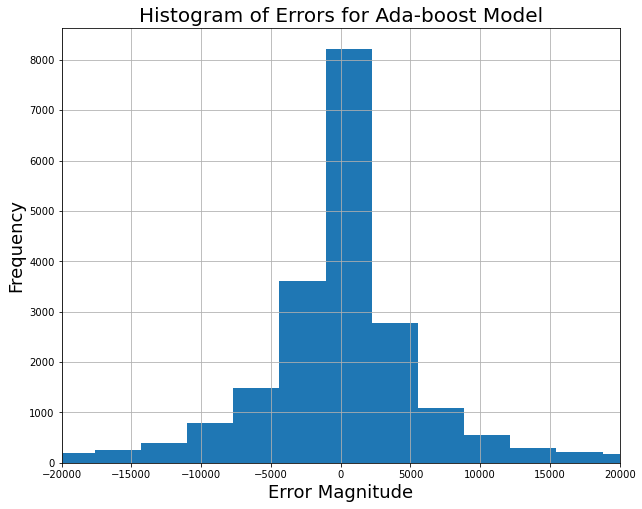

In [8]:
plt.figure(figsize = (10,8))
errors.hist(bins = 300)
plt.xlim(-20000,20000)
plt.title('Histogram of Errors for Ada-boost Model',fontsize = 20)
plt.xlabel('Error Magnitude',fontsize=18)
plt.ylabel('Frequency',fontsize =18)

### We can see from the error histogram above that are residuals are normally distributed

In [9]:
test_df = X_test.copy()

In [10]:
test_df['crop'] = df['crop']
test_df['country'] = df['country']
test_df['continent'] = df['continent']

In [11]:
test_df['predictions'] = preds
test_df['actuals'] = y_test
test_df

,year,area_hectares,nitrogen_fertilizer_tonnes,phosphorous_fertilizer_tonnes,potassium_fertilizer_tonnes,population,crop_Cassava,crop_Maize,crop_Potatoes,"crop_Rice, paddy",...,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,crop,country,continent,predictions,actuals
24622,49.0,34.0,5125.0,2316.0,5615.0,1247955.0,1,0,0,0,...,0,0,0,0,0,Cassava,Mauritius,Africa,125915.0,132059.0
1812,23.0,48081.0,344000.0,770445.1,141174.3,15423166.0,0,0,0,0,...,0,0,0,1,0,Soybeans,Australia,Oceania,16499.0,18435.0
7747,21.0,115000.0,48057.0,47268.0,12500.0,11743911.0,0,1,0,0,...,0,0,0,0,1,Maize,Chile,South America,27363.0,36957.0
29306,39.0,1264.0,2264600.0,675100.0,22800.0,142343578.0,0,0,0,0,...,1,0,0,0,0,Soybeans,Pakistan,Asia,12647.0,12160.0
26233,5.0,90815.0,5951.0,2983.0,3000.0,24823940.0,0,1,0,0,...,1,0,0,0,0,Maize,Myanmar,Asia,8750.0,6165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,14.0,127680.0,1600.0,1500.0,100.0,5001419.0,0,0,1,0,...,0,0,0,0,1,Potatoes,Bolivia (Plurinational State of),South America,56480.0,65323.0
36837,21.0,55316.0,95924.0,53527.0,5765.0,9590227.0,0,1,0,0,...,1,0,0,0,0,Maize,Syrian Arab Republic,Asia,8704.0,8954.0
29208,25.0,5446.0,1332570.0,409750.0,42880.0,95215378.0,0,0,0,0,...,1,0,0,0,0,Soybeans,Pakistan,Asia,5924.0,4747.0
36460,1.0,49000.0,23720.0,48795.0,48000.0,5487043.0,0,0,1,0,...,0,1,0,0,0,Potatoes,Switzerland,Europe,265000.0,230000.0


### Here we make some graphs that allow us to visualize our predicted values vs our actual yield to help us get a sense about how well our data fits the model visually


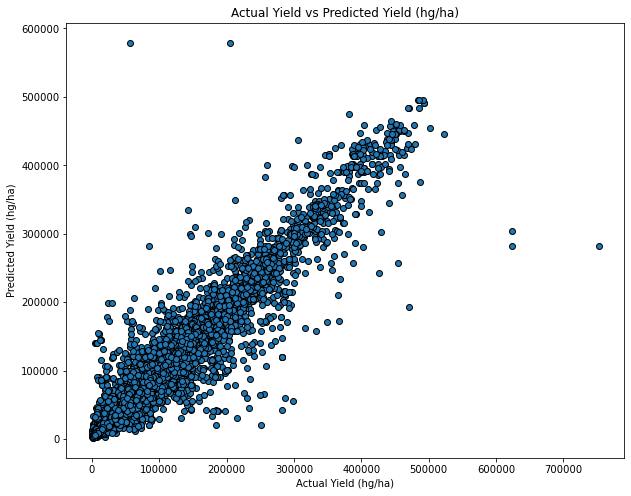

<Figure size 432x288 with 0 Axes>

In [12]:
fig, ax = plt.subplots(figsize = (10,8)) 
ax.scatter(test_df["actuals"], test_df["predictions"],edgecolors=(0, 0, 0))
ax.set_xlabel('Actual Yield (hg/ha)')
ax.set_ylabel('Predicted Yield (hg/ha)')
ax.set_title("Actual Yield vs Predicted Yield (hg/ha)")
plt.show()
plt.savefig('./images/actual_v_predict_yield_set1.png',bbox_inches = 'tight');

### Here we do the same types of visualizations as before but we will actuall do some calculations using our predictions to make "predictions" of Total production, which we had calculated in our data frame previously and visualized through EDA. This is a way to see whether our model maintains with other potential interactions in our feature data space.


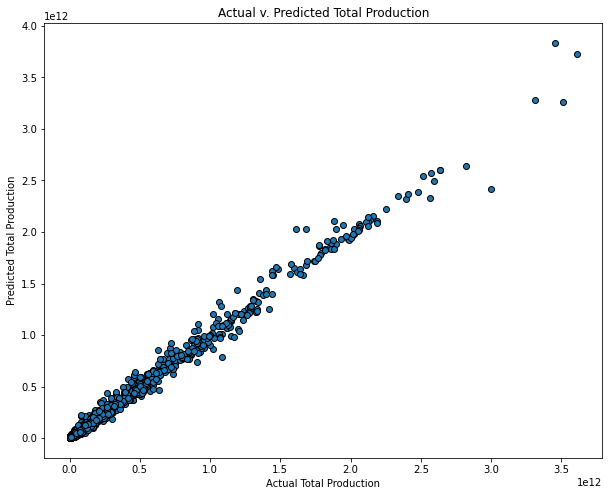

<Figure size 432x288 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize = (10,8)) 

ax.scatter((test_df["actuals"]*test_df['area_hectares']), (test_df["predictions"]*test_df['area_hectares']),edgecolors=(0, 0, 0))

ax.set_xlabel('Actual Total Production')
ax.set_ylabel('Predicted Total Production')
ax.set_title("Actual v. Predicted Total Production")
plt.show()
plt.savefig('./images/actual_v_predict_totprod_set1.png',bbox_inches = 'tight');

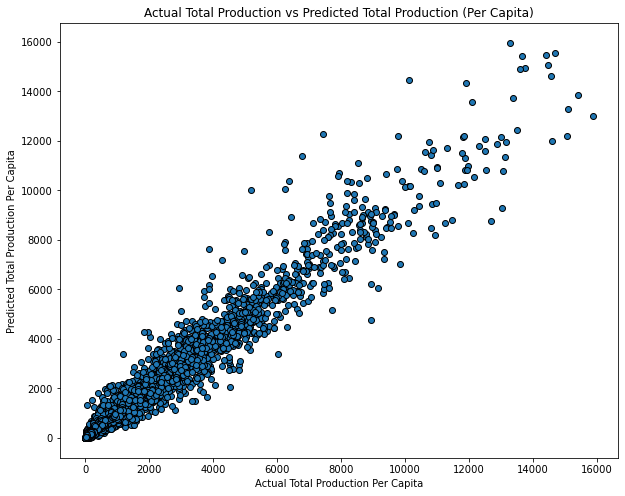

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize = (10,8)) 

ax.scatter((test_df["actuals"]*test_df['area_hectares'])/df['population'],(test_df["predictions"]*test_df['area_hectares'])/df['population'],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual Total Production Per Capita')
ax.set_ylabel('Predicted Total Production Per Capita')
ax.set_title("Actual Total Production vs Predicted Total Production (Per Capita)")
plt.show()
plt.savefig('./images/actual_v_predict_tp_percap_set1.png',bbox_inches = 'tight');

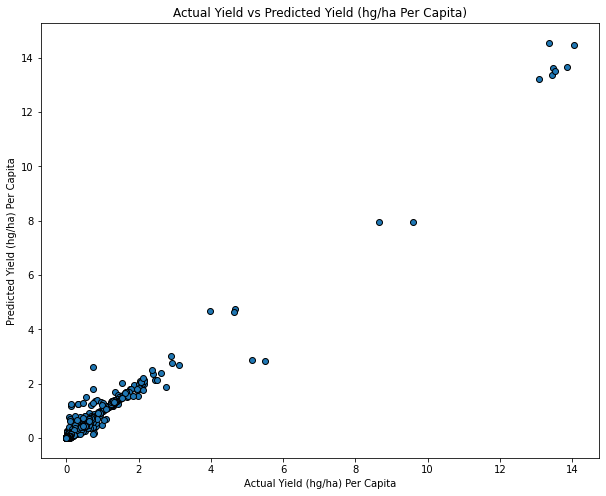

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize = (10,8)) 

ax.scatter(test_df["actuals"]/df['population'], test_df["predictions"]/df['population'],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual Yield (hg/ha) Per Capita')
ax.set_ylabel('Predicted Yield (hg/ha) Per Capita')
ax.set_title("Actual Yield vs Predicted Yield (hg/ha Per Capita)")
plt.show()
plt.savefig('./images/actual_v_predict_hgha_percap_set1.png',bbox_inches = 'tight');

<AxesSubplot:ylabel='crop'>

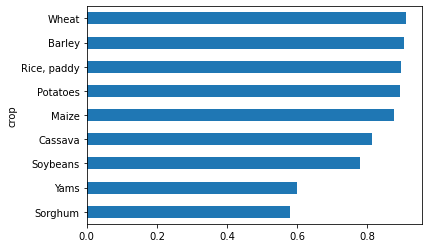

In [16]:
test_group=test_df.groupby("crop")
item_series = test_group.apply(lambda x: metrics.r2_score(x.actuals,x.predictions)).sort_values(ascending=True)
item_series.plot.barh()

<AxesSubplot:ylabel='continent'>

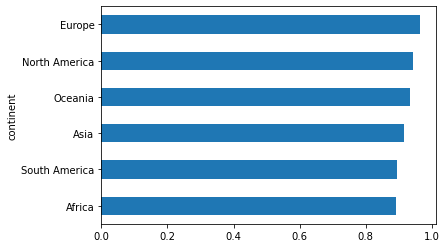

In [17]:
test_group=test_df.groupby("continent")
con_series = test_group.apply(lambda x: metrics.r2_score(x.actuals,x.predictions)).sort_values(ascending=True)
con_series.plot.barh()

In [18]:
test_group=test_df.groupby("country")
country_series=test_group.apply(lambda x: metrics.r2_score(x.actuals,x.predictions)).sort_values(ascending=False).head(20)
country_series

country
United States of America            0.997187
China, mainland                     0.995488
Democratic Republic of the Congo    0.995189
China                               0.994988
Canada                              0.993483
Bangladesh                          0.993447
Brazil                              0.992434
Australia                           0.991545
Gabon                               0.991007
Libya                               0.990814
Japan                               0.990444
Turkey                              0.988991
New Zealand                         0.988655
Egypt                               0.988350
South Africa                        0.985954
Pakistan                            0.985370
Spain                               0.985264
Italy                               0.985086
Peru                                0.984513
Indonesia                           0.984460
dtype: float64

### Let's create a metric of "importance" that is able to assess the most important features in our set

In [19]:
varimp = {'imp':ada.feature_importances_,'names':X.columns}

In [20]:
varimp

{'imp': array([6.75137259e-02, 1.63993452e-01, 4.95991851e-02, 6.08539507e-02,
        1.01355217e-01, 8.52004596e-02, 3.41993732e-02, 8.99355916e-03,
        2.76895608e-01, 8.05477112e-04, 1.90530717e-03, 9.64065960e-04,
        2.31817609e-04, 3.22790049e-02, 2.27569921e-02, 2.49008452e-02,
        1.48274712e-02, 6.92144736e-03, 4.58030412e-02]),
 'names': Index(['year', 'area_hectares', 'nitrogen_fertilizer_tonnes',
        'phosphorous_fertilizer_tonnes', 'potassium_fertilizer_tonnes',
        'population', 'crop_Cassava', 'crop_Maize', 'crop_Potatoes',
        'crop_Rice, paddy', 'crop_Sorghum', 'crop_Soybeans', 'crop_Wheat',
        'crop_Yams', 'continent_Asia', 'continent_Europe',
        'continent_North America', 'continent_Oceania',
        'continent_South America'],
       dtype='object')}

In [21]:
varimp_dict = list(dict(varimp).items())
varimp_dict

[('imp',
  array([6.75137259e-02, 1.63993452e-01, 4.95991851e-02, 6.08539507e-02,
         1.01355217e-01, 8.52004596e-02, 3.41993732e-02, 8.99355916e-03,
         2.76895608e-01, 8.05477112e-04, 1.90530717e-03, 9.64065960e-04,
         2.31817609e-04, 3.22790049e-02, 2.27569921e-02, 2.49008452e-02,
         1.48274712e-02, 6.92144736e-03, 4.58030412e-02])),
 ('names',
  Index(['year', 'area_hectares', 'nitrogen_fertilizer_tonnes',
         'phosphorous_fertilizer_tonnes', 'potassium_fertilizer_tonnes',
         'population', 'crop_Cassava', 'crop_Maize', 'crop_Potatoes',
         'crop_Rice, paddy', 'crop_Sorghum', 'crop_Soybeans', 'crop_Wheat',
         'crop_Yams', 'continent_Asia', 'continent_Europe',
         'continent_North America', 'continent_Oceania',
         'continent_South America'],
        dtype='object'))]

In [22]:

df_imp=pd.DataFrame.from_dict(varimp)
df_imp.sort_values('imp',ascending = False).head(10)

,imp,names
8,0.276896,crop_Potatoes
1,0.163993,area_hectares
4,0.101355,potassium_fertilizer_tonnes
5,0.085200,population
0,0.067514,year
3,0.060854,phosphorous_fertilizer_tonnes
2,0.049599,nitrogen_fertilizer_tonnes
18,0.045803,continent_South America
6,0.034199,crop_Cassava
13,0.032279,crop_Yams


### Let's rank our features by importance feature we calculated above

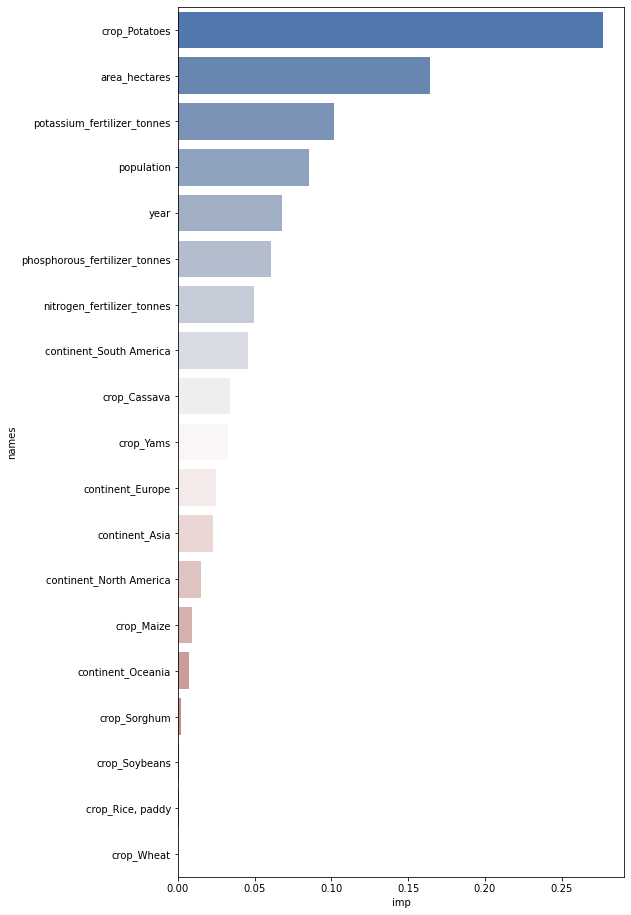

In [23]:
a4_dims = (8,16)
fig, ax = plt.subplots(figsize=a4_dims)
df_imp=pd.DataFrame.from_dict(varimp)
df_imp.sort_values(ascending=False,by=["imp"],inplace=True)
sns.barplot(x="imp",y="names",palette="vlag",data=df_imp,orient="h",ax=ax);

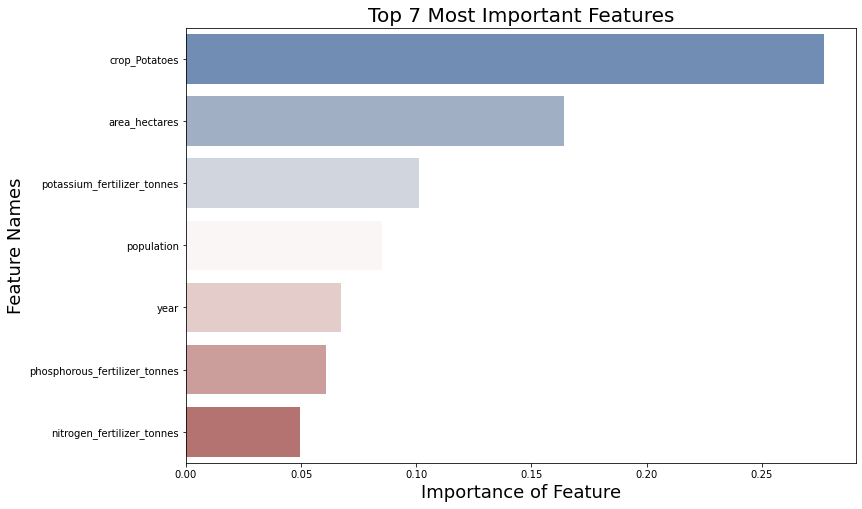

In [24]:
a4_dims = (12,8)

fig, ax = plt.subplots(figsize=a4_dims)
df_imp=pd.DataFrame.from_dict(varimp)
df_imp.sort_values(ascending=False,by=["imp"],inplace=True)
df_imp=df_imp.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df_imp,orient="h",ax=ax);
plt.title('Top 7 Most Important Features',fontsize = 20)
plt.xlabel('Importance of Feature',fontsize = 18)
plt.ylabel('Feature Names',fontsize = 18)
plt.savefig('./images/modeling_top7_features_set1.png',bbox_inches = 'tight');

## MODELING WITH DUMMIFIED COUNTRY COLS
#### Here we created a second set to run our models on that included a much larger feature set by dummying our country column

In [25]:
df = pd.read_csv('./output/data_post_eda.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df['year'] = df['year'] - 1961

df_m = pd.get_dummies(df, columns=['crop', 'continent', 'country'], drop_first=True)
df_m.head()

y = df_m['yield_hg_per_ha'] #unable to use other yield columns
X = df_m.drop(columns=['total_yield', 'yield_per_capita', 'yield_hg_per_ha','total_yield_per_capita'])

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.5)

In [26]:
df_m.corr()[['yield_hg_per_ha']].sort_values('yield_hg_per_ha').iloc[:-1, :]

,yield_hg_per_ha
crop_Soybeans,-0.191129
crop_Sorghum,-0.187726
crop_Wheat,-0.166047
crop_Maize,-0.146375
"crop_Rice, paddy",-0.129438
...,...
continent_Europe,0.134181
yield_per_capita,0.144255
year,0.155844
crop_Cassava,0.190561


In [27]:
df_m.shape

(43265, 193)

In [28]:
mlr = LinearRegression()
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor(random_state=42)
bag = BaggingRegressor()
rf = RandomForestRegressor(random_state=42)
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42)
gb = GradientBoostingRegressor(random_state=42)

pipe_mlr = Pipeline([
    ('ss', StandardScaler()),
    ('mlr', LinearRegression())
])

pipe_knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipe_dtree = Pipeline([
    ('ss', StandardScaler()),
    ('dtree', DecisionTreeRegressor(random_state=42))
])

pipe_bag = Pipeline([
    ('ss', StandardScaler()),
    ('bag', BaggingRegressor())
])

pipe_rf = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

pipe_ada = Pipeline([
    ('ss', StandardScaler()),
    ('ada', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42))
])

pipe_gboost = Pipeline([
    ('ss', StandardScaler()),
    ('gboost', GradientBoostingRegressor(random_state=42))
])


pipe_mlr.fit(X_train,y_train)
pipe_knn.fit(X_train,y_train)
pipe_dtree.fit(X_train,y_train)
pipe_bag.fit(X_train,y_train)
pipe_rf.fit(X_train,y_train)
pipe_ada.fit(X_train,y_train)
pipe_gboost.fit(X_train,y_train)

print(f'Multiple Linear Regression Train Score is: {pipe_mlr.score(X_train,y_train)}')
print(f'Multiple Linear Regression Test Score is: {pipe_mlr.score(X_test,y_test)}')

print(f'K Nearest Neighbors Regressors Train Score is: {pipe_knn.score(X_train,y_train)}')
print(f'K Nearest Neighbors Regressors Test Score is: {pipe_knn.score(X_test,y_test)}')

print(f'Decision Tree Regressor Train Score is: {pipe_dtree.score(X_train,y_train)}')
print(f'Decision Tree Regressor Test Score is: {pipe_dtree.score(X_test,y_test)}')

print(f'Bagging Regressor Train Score is: {pipe_bag.score(X_train,y_train)}')
print(f'Bagging Regressor Test Score is: {pipe_bag.score(X_test,y_test)}')

print(f'Random Forest Regressors Train Score is: {pipe_rf.score(X_train,y_train)}')
print(f'Random Forest Regressors Test Score is: {pipe_rf.score(X_test,y_test)}')

print(f'Ada Boost Regressor Train Score is: {pipe_ada.score(X_train,y_train)}')
print(f'Ada Boost Regressor Test Score is: {pipe_ada.score(X_test,y_test)}')

print(f'Gradient Boost Train Score is: {pipe_gboost.score(X_train,y_train)}')
print(f'Gradient Boost Test Score is: {pipe_gboost.score(X_test,y_test)}')

Multiple Linear Regression Train Score is: 0.7150559375400807
Multiple Linear Regression Test Score is: 0.7151242067196766
K Nearest Neighbors Regressors Train Score is: 0.9720291698486196
K Nearest Neighbors Regressors Test Score is: 0.95807271362449
Decision Tree Regressor Train Score is: 1.0
Decision Tree Regressor Test Score is: 0.8986806097072213
Bagging Regressor Train Score is: 0.9892252293072977
Bagging Regressor Test Score is: 0.9447589282205875
Random Forest Regressors Train Score is: 0.9928364242021229
Random Forest Regressors Test Score is: 0.9517670891104695
Ada Boost Regressor Train Score is: 0.9999351492259344
Ada Boost Regressor Test Score is: 0.9600639071354409
Gradient Boost Train Score is: 0.7953289914667756
Gradient Boost Test Score is: 0.7883817909970583


### Let's review the scores of our top 3 models for Set 2

In [29]:
preds_ada = pipe_ada.predict(X_test)
print_scores(y_test,preds_ada, 'Ada Boost')
preds_rf = pipe_rf.predict(X_test)
print_scores(y_test,preds_rf, 'Random Forest')
preds_bagging = pipe_bag.predict(X_test)
print_scores(y_test,preds_bagging, 'Bagging')

Ada Boost R2 Score: 0.9600639071354409
Ada Boost MAE Score: 6069.8684417325385
Ada Boost RMSE Score: 14048.54744354767
Ada Boost MSE Score: 197361685.27360976
Random Forest R2 Score: 0.9517670891104695
Random Forest MAE Score: 7015.389017704433
Random Forest RMSE Score: 15439.042831426603
Random Forest MSE Score: 238364043.55062515
Bagging R2 Score: 0.9447589282205875
Bagging MAE Score: 7481.162201266584
Bagging RMSE Score: 16522.64925710643
Bagging MSE Score: 272997938.4733597


## WHICH MODEL IS IDEAL?

Using the different feature sets and different models, it seems clear that the current *ada boost* model on the current feature set is what is best as it has limited errors as seen by the metrics and a consistently high r2 score. 

Visualizing the preferred model

In [30]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
ada.fit(X_train_sc,y_train)
ada.score(X_train_sc,y_train), ada.score(X_test_sc,y_test)

(0.9999351492259344, 0.9600639071354409)

In [31]:
preds = ada.predict(X_test_sc)
errors = (preds - y_test)

Text(0, 0.5, 'Frequency')

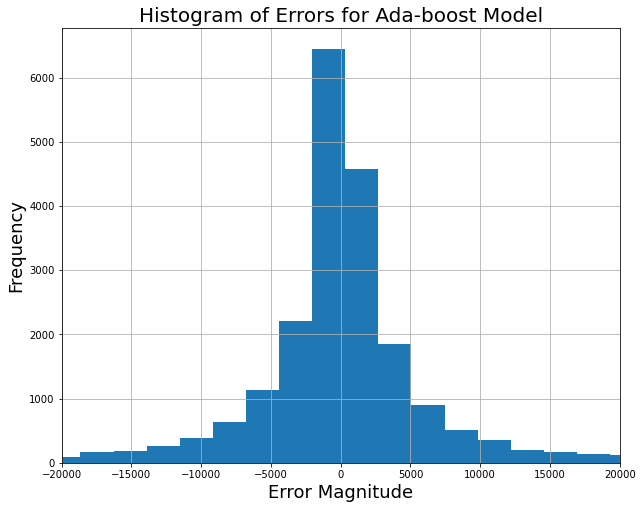

In [32]:
plt.figure(figsize = (10,8))
errors.hist(bins = 300)
plt.title('Histogram of Errors for Ada-boost Model',fontsize=20)
plt.xlim(-20000,20000)
plt.xlabel('Error Magnitude',fontsize=18)
plt.ylabel('Frequency',fontsize=18)

In [33]:
test_df = X_test.copy()

In [34]:
test_df['crop'] = df['crop'].copy()
test_df['country'] = df['country'].copy()
test_df['continent'] = df['continent'].copy()

In [35]:
test_df['predictions'] = preds
test_df['actuals'] = y_test
test_df

,year,area_hectares,nitrogen_fertilizer_tonnes,phosphorous_fertilizer_tonnes,potassium_fertilizer_tonnes,population,crop_Cassava,crop_Maize,crop_Potatoes,"crop_Rice, paddy",...,country_Viet Nam,country_Yemen,country_Yugoslav SFR,country_Zambia,country_Zimbabwe,crop,country,continent,predictions,actuals
24622,49.0,34.0,5125.0,2316.0,5615.0,1247955.0,1,0,0,0,...,0,0,0,0,0,Cassava,Mauritius,Africa,125915.0,132059.0
1812,23.0,48081.0,344000.0,770445.1,141174.3,15423166.0,0,0,0,0,...,0,0,0,0,0,Soybeans,Australia,Oceania,16499.0,18435.0
7747,21.0,115000.0,48057.0,47268.0,12500.0,11743911.0,0,1,0,0,...,0,0,0,0,0,Maize,Chile,South America,39284.0,36957.0
29306,39.0,1264.0,2264600.0,675100.0,22800.0,142343578.0,0,0,0,0,...,0,0,0,0,0,Soybeans,Pakistan,Asia,12021.0,12160.0
26233,5.0,90815.0,5951.0,2983.0,3000.0,24823940.0,0,1,0,0,...,0,0,0,0,0,Maize,Myanmar,Asia,7452.0,6165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,14.0,127680.0,1600.0,1500.0,100.0,5001419.0,0,0,1,0,...,0,0,0,0,0,Potatoes,Bolivia (Plurinational State of),South America,59259.0,65323.0
36837,21.0,55316.0,95924.0,53527.0,5765.0,9590227.0,0,1,0,0,...,0,0,0,0,0,Maize,Syrian Arab Republic,Asia,6098.0,8954.0
29208,25.0,5446.0,1332570.0,409750.0,42880.0,95215378.0,0,0,0,0,...,0,0,0,0,0,Soybeans,Pakistan,Asia,7082.0,4747.0
36460,1.0,49000.0,23720.0,48795.0,48000.0,5487043.0,0,0,1,0,...,0,0,0,0,0,Potatoes,Switzerland,Europe,265000.0,230000.0


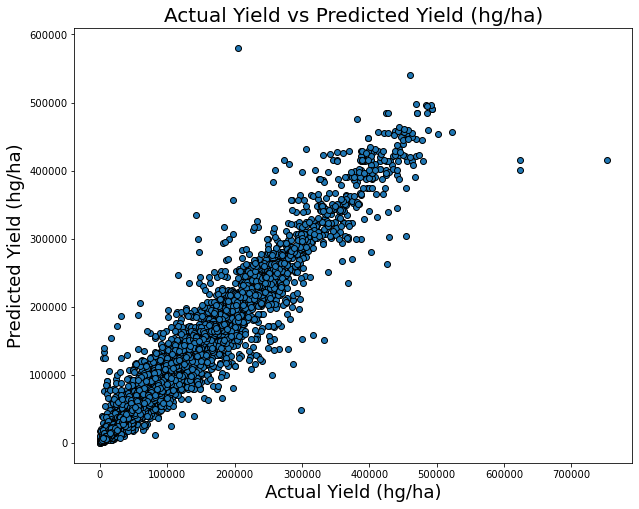

In [36]:
fig, ax = plt.subplots(figsize = (10,8)) 

ax.scatter(test_df["actuals"], test_df["predictions"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual Yield (hg/ha)',fontsize = 18)
ax.set_ylabel('Predicted Yield (hg/ha)',fontsize = 18)
ax.set_title("Actual Yield vs Predicted Yield (hg/ha)",fontsize = 20)
plt.savefig('./images/actual_v_predict_yield_set2.png',bbox_inches = 'tight');
plt.show()


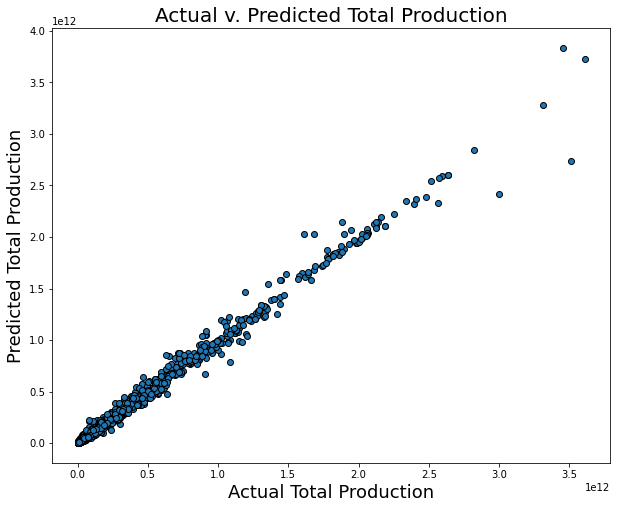

In [37]:
fig, ax = plt.subplots(figsize = (10,8)) 

ax.scatter((test_df["actuals"]*test_df['area_hectares']), (test_df["predictions"]*test_df['area_hectares']),edgecolors=(0, 0, 0))

ax.set_xlabel('Actual Total Production',fontsize = 18)
ax.set_ylabel('Predicted Total Production',fontsize = 18)
ax.set_title("Actual v. Predicted Total Production",fontsize = 20)
plt.savefig('./images/actual_v_predict_totprod_set2.png',bbox_inches = 'tight');
plt.show()


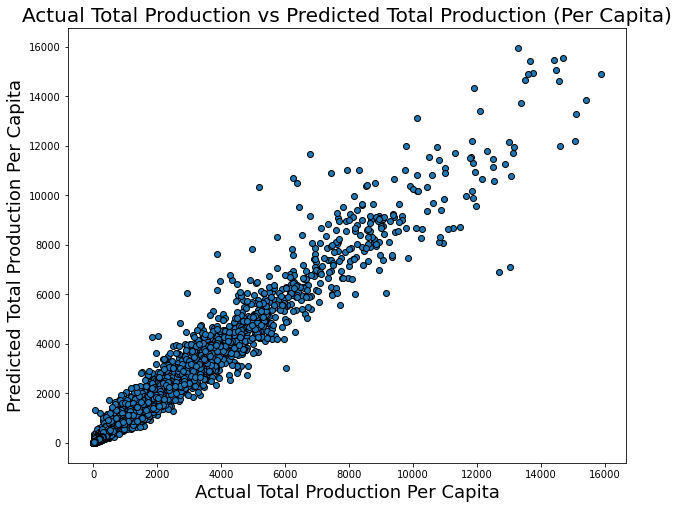

In [38]:
fig, ax = plt.subplots(figsize = (10,8)) 

ax.scatter((test_df["actuals"]*test_df['area_hectares'])/df['population'],(test_df["predictions"]*test_df['area_hectares'])/df['population'],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual Total Production Per Capita',fontsize = 18)
ax.set_ylabel('Predicted Total Production Per Capita',fontsize = 18)
ax.set_title("Actual Total Production vs Predicted Total Production (Per Capita)",fontsize = 20)
plt.savefig('./images/actual_v_predict_tp_percap_set2.png',bbox_inches = 'tight');
plt.show()


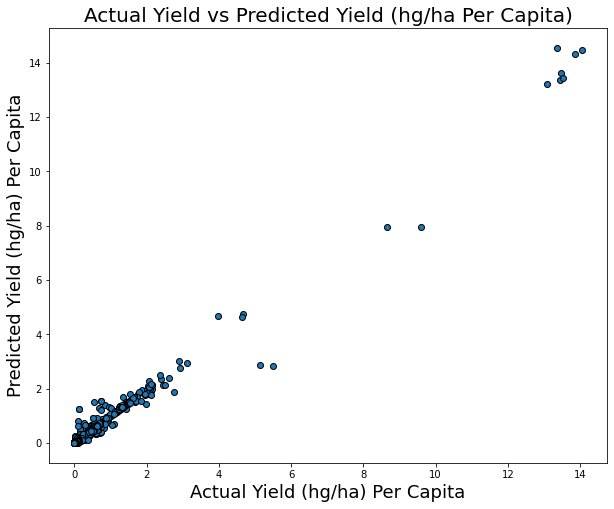

In [39]:
fig, ax = plt.subplots(figsize = (10,8)) 

ax.scatter(test_df["actuals"]/df['population'], test_df["predictions"]/df['population'],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual Yield (hg/ha) Per Capita',fontsize = 18)
ax.set_ylabel('Predicted Yield (hg/ha) Per Capita',fontsize = 18)
ax.set_title("Actual Yield vs Predicted Yield (hg/ha Per Capita)",fontsize = 20)
plt.savefig('./images/actual_v_predict_hgha_percap_set2.png',bbox_inches = 'tight');
plt.show()


<AxesSubplot:ylabel='crop'>

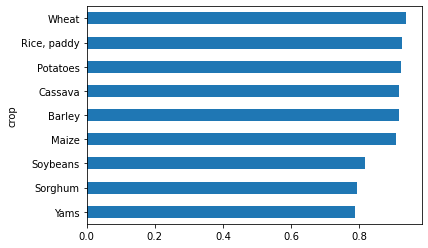

In [40]:
test_group=test_df.groupby("crop")
item_series = test_group.apply(lambda x: metrics.r2_score(x.actuals,x.predictions)).sort_values(ascending=True)
item_series.plot.barh()

<AxesSubplot:ylabel='continent'>

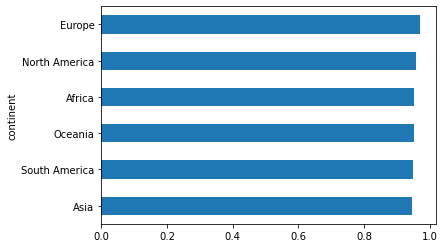

In [41]:
test_group=test_df.groupby("continent")
con_series = test_group.apply(lambda x: metrics.r2_score(x.actuals,x.predictions)).sort_values(ascending=True)
con_series.plot.barh()

In [42]:
test_group=test_df.groupby("country")
country_series=test_group.apply(lambda x: metrics.r2_score(x.actuals,x.predictions)).sort_values(ascending=False).head(20)
country_series

country
Democratic Republic of the Congo    0.997199
United States of America            0.996509
China                               0.995741
China, mainland                     0.995640
Botswana                            0.994866
Gabon                               0.994129
Canada                              0.993799
Brazil                              0.993488
Australia                           0.991534
Peru                                0.991373
Japan                               0.991018
New Zealand                         0.990773
Turkey                              0.990680
Guatemala                           0.989910
Egypt                               0.989828
Bangladesh                          0.989062
South Africa                        0.988695
Ghana                               0.988383
India                               0.987861
Italy                               0.987706
dtype: float64

In [43]:
varimp= {'imp':ada.feature_importances_,'names':X.columns}

In [44]:
df_imp=pd.DataFrame.from_dict(varimp).sort_values('imp',ascending=False).head(10)
df_imp

,imp,names
8,0.267836,crop_Potatoes
87,0.131238,country_Guyana
0,0.066515,year
1,0.059218,area_hectares
4,0.053290,potassium_fertilizer_tonnes
2,0.048835,nitrogen_fertilizer_tonnes
5,0.044123,population
13,0.039697,crop_Yams
33,0.033897,country_Belgium
6,0.032919,crop_Cassava


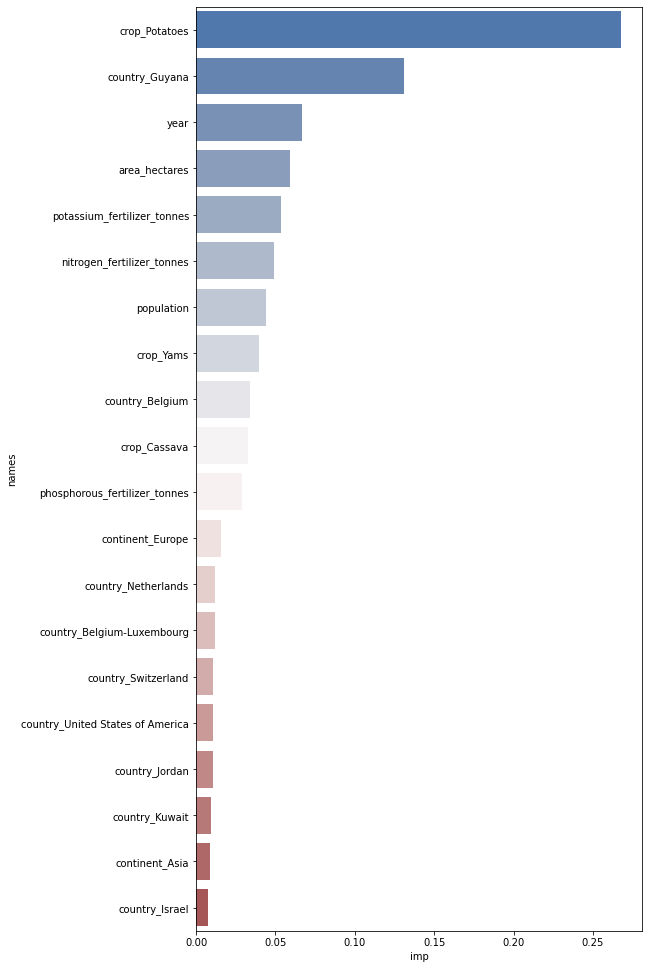

In [45]:
a4_dims = (8,17)

fig, ax = plt.subplots(figsize=a4_dims)
df_imp=pd.DataFrame.from_dict(varimp)
df_imp.sort_values(ascending=False,by=["imp"],inplace=True)
df_imp=df_imp.nlargest(20, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df_imp,orient="h",ax=ax);

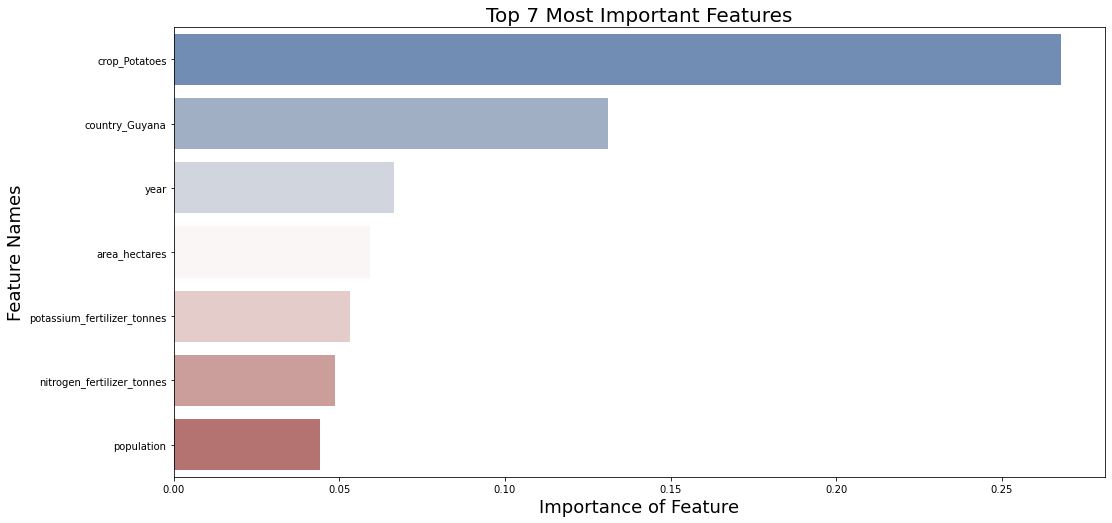

In [46]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df_imp=pd.DataFrame.from_dict(varimp)
df_imp.sort_values(ascending=False,by=["imp"],inplace=True)
df_imp=df_imp.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df_imp,orient="h",ax=ax);
plt.title('Top 7 Most Important Features',fontsize = 20)
plt.xlabel('Importance of Feature',fontsize = 18)
plt.ylabel('Feature Names',fontsize = 18)
plt.savefig('./images/modeling_top7_features_set2.png',bbox_inches = 'tight');

## References


[FAOSTAT Food and Agriculture Data](https://www.fao.org/faostat/en/)

[Crop yield prediction using machine learning: A systematic literature review](https://www.sciencedirect.com/science/article/pii/S0168169920302301#b0470)

[Crop Yield [EDA + Viz]](https://www.kaggle.com/patelris/crop-yield-eda-viz/data)

[How data scientists are tackling hunger and social change](https://www.elsevier.com/connect/how-data-scientists-are-tackling-hunger-and-social-change)

[PyCountry Documentation](https://pypi.org/project/pycountry/)

[Remap Values in Pandas Column](https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans)

[Horizontal Bar Plots Seaborn](https://seaborn.pydata.org/examples/part_whole_bars.html)

[Box Plots Seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)

[Line Plots Seaborn](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

[Change Figure Size with Subplots](https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots/14770827)

